In [ ]:
import pandas as pd
import networkx as nx
import hashlib
import numpy as np

# A method that gives the maximum PageRank list of a graph file

def getMaximumPageRankList(filename):

  file_ = open(filename, 'r')




  graphList = []
  ultimate_graphList = []  
  graphCounter = 0
  while True: 
  
    # Get next line from file 
      line = file_.readline() 
  
    # if line is empty 
    # end of file is reached 
      if not line: 
          break
    

    
      graph_number = line[0:12]
    
      if graph_number == "Graph Number":
      #print(graph_number+str(graphCounter))
        graphCounter += 1
        line = file_.readline()
        line = file_.readline()
        line = file_.readline()

        if graphCounter >= 2:
          ultimate_graphList.append(graphList)
          graphList = []


    
      list1 = line.split()
      graphList.append(list1)



  ultimate_graphList.append(graphList)
    
  file_.close()

  list_All_Feature_Set = []
 
  filetowrite = filename[:-4]+"_Pagerank_Max.txt"
  file1 = open(filetowrite,'w')

  graphNumber = len(ultimate_graphList)
# Iterating every graph
  for i in range(0,graphNumber):

    G = nx.DiGraph()
    graphEdgeNumber = len(ultimate_graphList[i])
    max_pagerank_vertices = 0 # defining variable for detecting max pagerank
  #making the graph
    for j in range(0,graphEdgeNumber):
      vertexConnectionLength = len(ultimate_graphList[i][j])

      for k in range(2,vertexConnectionLength):
      
      
        G.add_edge(ultimate_graphList[i][j][0],ultimate_graphList[i][j][k])
    weighted_Feature_Set = nx.pagerank(G)

    file1.write(str(i+1)+"\n")
    for key,val in weighted_Feature_Set.items():
      if val > max_pagerank_vertices:
        max_pagerank_vertices = val
        max_id = key
    file1.write(str(max_id)+str(" -----> ")+str(max_pagerank_vertices)+"\n")
  


  file1.close()

file_overview = 'overView.txt'
file_dosoverview = 'DoSOverView.txt'



getMaximumPageRankList(file_overview)
getMaximumPageRankList(file_dosoverview)




  

  






In [27]:
import numpy as np
#Reading the maximum page rank list for overview and dosoverview
def showlist(filename):

  list1 = []
  file2 = open(filename, 'r')

  while True: 
  
    # Get next line from file 
      line = file2.readline() 
  
    # if line is empty 
    # end of file is reached 
      if not line: 
          break
      list1.append(line.split())
  
  file2.close()

  len_list = len(list1)
  list_view = []
  
  for i in range(0, len_list):
    if len(list1[i]) > 1:
      list_view.append(float(list1[i][2]))
  

  return list_view

list_oview_mx = showlist('overView_Pagerank_Max.txt')
list_dview_mx = showlist('dosoverView_Pagerank_Max.txt')


print("length of overview---->"+str(len(list_oview_mx)))
print("Overview_list------>"+ str(list_oview_mx))

print("length of dosoverview---->"+str(len(list_dview_mx)))
print("dosOverview_list------>"+ str(list_dview_mx))



# 0 means attacked graph and 1 means attack free graph
# It will be detecting confusion matrix

actual = np.ones(len(list_dview_mx))
predicted = np.ones(len(list_dview_mx))


threshold = np.median(list_oview_mx) + 6*np.std(list_oview_mx) 
#minnn = np.median(list_oview_mn) + 5*np.std(list_oview_mn)
detected_attack = []
ld = len(list_dview_mx)
for i in range (0, ld):
  if list_dview_mx[i] > threshold: 
    detected_attack .append(i+1)
    predicted[i] = 0

print("Length of detected attack---->"+str(len(detected_attack )))
print("List of detected attack---->"+str(detected_attack)) 


length of overview---->18565
Overview_list------>[0.07360649759034145, 0.0882129092099077, 0.06481770478688069, 0.06056133926828235, 0.06592232401066012, 0.10518513919016449, 0.060017927043157754, 0.07690567022466596, 0.08465117987780185, 0.06303756319358837, 0.06468437491104687, 0.06300546196902661, 0.09906474604985083, 0.0803391542630863, 0.06971247344247933, 0.056260209825048896, 0.09066739550169527, 0.060965890129263456, 0.06365795990759202, 0.10576720585426577, 0.09948552869625467, 0.0660590832741144, 0.06119997965779342, 0.07383614236981612, 0.08837684680603664, 0.06829513351351975, 0.0611143906099753, 0.08644204915061851, 0.07950079324072841, 0.07861227525625568, 0.051879727462204296, 0.06786229301262509, 0.06858817800614576, 0.05945276611918837, 0.05217216538709974, 0.08696008176703207, 0.08250153921325903, 0.060471302426898715, 0.07302118660459402, 0.06654460071919491, 0.0867885147848396, 0.05979370905580751, 0.060644355188172516, 0.07096572385937297, 0.05542092409916266, 0.08

In [28]:
file2 = open('dosAffectedGraphNo.txt', 'r')
list1 = []
while True: 
  
    # Get next line from file 
    line = file2.readline() 
  
    # if line is empty 
    # end of file is reached 
    if not line: 
        break
    list1.append(line.split())
  
file2.close()

list2 = []

for i in range(0, len(list1)):
  list2.append(int(list1[i][0]))




for i in range(0, len(list2)):

  actual[ (list2[i]) - 1] = 0

undetected = set(list2)-set(detected_attack )
wrong_detection = set(detected_attack ) - set(list2)
print("Length of undetected attack---->"+str(len(undetected)))
print("Undetected List----->"+str(undetected))

print("Length of wrong detection---->"+str(len(wrong_detection)))
print("Wrong detection List---->"+str(wrong_detection))





Length of undetected attack---->88
Undetected List----->{12288, 5637, 1545, 7178, 6161, 7187, 9762, 10277, 6187, 3630, 8754, 13368, 2626, 1603, 8780, 9809, 12881, 8791, 2653, 1123, 11876, 615, 6780, 7805, 1670, 5256, 4762, 1181, 1697, 6305, 10417, 3774, 1730, 10438, 3275, 2265, 8429, 4335, 1267, 8439, 248, 5883, 3323, 13066, 11019, 1295, 7465, 3386, 10556, 5949, 6978, 10064, 6481, 11603, 1368, 7004, 1885, 4452, 13173, 6523, 9598, 2430, 4998, 12691, 2455, 6043, 1953, 938, 5035, 1456, 7609, 6082, 5061, 5577, 7115, 8652, 9163, 5071, 3542, 2528, 4580, 9189, 12265, 4079, 7153, 9714, 11252, 13303}
Length of wrong detection---->30
Wrong detection List---->{11522, 13187, 4872, 11529, 11533, 12814, 11919, 2584, 6180, 5926, 1703, 2602, 1583, 11573, 13380, 2505, 5578, 14538, 5965, 5072, 11604, 5973, 983, 1242, 12902, 4329, 12908, 1645, 2542, 1269}


[[ 5587    88]
 [   30 12623]]


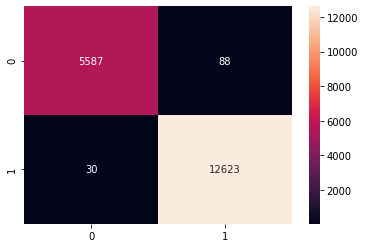

In [31]:
# for confusion matrix... 0 for attacked graph 1 for attackfree graph

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sn
cm = confusion_matrix(actual, predicted)



sn.heatmap(cm, annot=True, fmt = "")


In [30]:
#it gives the all score regarding the system

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print(classification_report(actual, predicted, digits = 5))


              precision    recall  f1-score   support

         0.0    0.99466   0.98449   0.98955      5675
         1.0    0.99308   0.99763   0.99535     12653

    accuracy                        0.99356     18328
   macro avg    0.99387   0.99106   0.99245     18328
weighted avg    0.99357   0.99356   0.99355     18328

